<a href="https://colab.research.google.com/github/gustavopierre/personality_trait/blob/main/api/machinelearning/notebook/personality_trait.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/code/satriahelmy/extrovert-vs-introvert
https://www.kaggle.com/code/muhammedaliyilmazz/personality-trait-classification-with-ml-models

<p align="left"  style="display: flex;">
    <a href="https://www.linkedin.com/in/gustavo_pierre">
        <img src="https://img.shields.io/badge/LinkedIn-gustavo--pierre-blue" alt="Gustavo Pierre's LinkedIn link">
    </a>
    <a href="https://github.com/gustavopierre/portfolio">
        <img src="https://img.shields.io/badge/portfolio-github-orange" alt="Gustavo Pierre's GitHub portfolio link">
    </a>
    <a href="https://www.python.org/downloads">
        <img src="https://img.shields.io/badge/python-3.10+-yellow" alt="Python download site">
    </a>
    <a href="https://github.com/gustavopierre/personality_trait/issues">
        <img src="https://img.shields.io/badge/contributions-welcome-brightgreen.svg?style=flat" alt="Contributions to the project">
    </a>
</p>

<div style="text-align: left;">
  <img src="https://github.com/gustavopierre/personality_trait/blob/main/api/machinelearning/notebook/image/pexels-mikhail-nilov-7929420.jpg?raw=true" alt="Boy sitting alone while other children talk in the background" style="max-width: 50%; height: auto;">
  <div style="font-size: 14px; color: #555; margin-top: 5px;">
    <a href="https://www.pexels.com/pt-br/foto/crianca-filho-aluno-estudante-7929420/">Photo by Mikhail Nilov on Pexels</a>
  </div>
</div>


# **Personality Trait**

## Introduction

### Objective

This notebook is part of the MVP for the subject Software Quality, Security and Intelligent Systems in the posgraduation in Software Engineering at the Pontifical Catholic University of Rio de Janeiro. The goal is predict  whether a person is introverted or extroverted based on their social behavior.

### Data Description

The data was synthetically generated by Syncoraai and made available on Kaggle. It contains information about individual behavior patterns, habits, and social trends. Each record refers to a person. The goal is to classify them as extroverted or introverted based on these characteristics. The features are:


1. **Time_spent_Alone** (`float`)  
   Average number of hours a person spends alone per day. Higher values may suggest introverted tendencies.

2. **Stage_fear** (`int` — 0 or 1)  
   Indicates whether the person has a fear of public speaking. A value of 1 means they do, which may be associated with introversion.

3. **Social_event_attendance** (`float`)  
   Frequency of attending social events such as parties or gatherings. Higher frequency indicates extroversion.

4. **Going_outside** (`float`)  
   Represents how often the person goes outside for leisure or daily errands.

5. **Drained_after_socializing** (`int` — 0 or 1)  
   Shows whether the person feels emotionally drained after socializing. A value of 1 may reflect introverted behavior.

6. **Friends_circle_size** (`float`)  
   Size of the person's social circle. A larger circle often corresponds to extroverted traits.

7. **Post_frequency** (`float`)  
   Frequency of social media posting. Can reflect levels of social engagement.

8. **Personality** (`int` — 0 or 1)  
   Target variable. 0 means extroverted, and 1 means introverted.


## Importing Libraries

In [23]:
import warnings
warnings.filterwarnings("ignore")

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier, VotingClassifier, BaggingClassifier, RandomForestClassifier
import pickle

## Loading and Exploring the Data

In [25]:
url = "https://raw.githubusercontent.com/gustavopierre/personality_trait/refs/heads/main/api/machinelearning/data/data.csv"
df = pd.read_csv(url)
df.shape

(4998, 8)

In [26]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0.0,0,4.0,7.0,0,13.0,4.0,0
1,1.0,0,4.0,4.0,0,11.0,5.0,0
2,4.0,1,3.0,1.0,1,3.0,1.0,1
3,6.0,1,0.0,2.0,1,1.0,0.0,1
4,-0.0,0,4.0,6.0,0,13.0,5.0,0


In [27]:
df.tail()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
4993,2.0,0,7.0,7.0,0,7.0,4.0,0
4994,-0.0,0,9.0,5.0,0,9.0,7.0,0
4995,5.0,1,0.0,2.0,1,3.0,-0.0,1
4996,3.0,0,7.0,5.0,0,6.0,4.0,0
4997,11.0,1,3.0,1.0,1,4.0,-0.0,1


In [28]:
df.isnull().sum()

Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           4998 non-null   float64
 1   Stage_fear                 4998 non-null   int64  
 2   Social_event_attendance    4998 non-null   float64
 3   Going_outside              4998 non-null   float64
 4   Drained_after_socializing  4998 non-null   int64  
 5   Friends_circle_size        4998 non-null   float64
 6   Post_frequency             4998 non-null   float64
 7   Personality                4998 non-null   int64  
dtypes: float64(5), int64(3)
memory usage: 312.5 KB


We have seen that there are values equal to -0.0. Let's how many negative values there are.

In [31]:
# Count negative values per column
negative_counts = (df < 0).sum()

# Filter only columns that have at least one negative value
columns_with_negatives = negative_counts[negative_counts > 0]

print(columns_with_negatives)

Time_spent_Alone           61
Social_event_attendance    26
Going_outside               7
Friends_circle_size        20
Post_frequency             39
dtype: int64


In [32]:
# Display records with negative values in Time_spent_Alone column
negative_time_alone = df[df['Time_spent_Alone'] < 0]
print(f"Number of records with negative Time_spent_Alone: {len(negative_time_alone)}")
print("\nRecords with negative Time_spent_Alone:")
print(negative_time_alone)

Number of records with negative Time_spent_Alone: 61

Records with negative Time_spent_Alone:
      Time_spent_Alone  Stage_fear  Social_event_attendance  Going_outside  \
92                -1.0           0                      6.0            7.0   
142               -1.0           0                      3.0            6.0   
460               -1.0           0                      4.0            7.0   
562               -1.0           0                      4.0            7.0   
571               -1.0           0                      7.0            5.0   
...                ...         ...                      ...            ...   
4752              -1.0           0                      4.0            4.0   
4789              -1.0           0                      4.0            3.0   
4828              -1.0           0                      9.0            6.0   
4860              -1.0           0                      6.0            3.0   
4985              -1.0           0              

In [34]:
# Count how many records have at least one negative value in any column
records_with_negatives = (df < 0).any(axis=1)
num_records_with_negatives = records_with_negatives.sum()

print(f"Total records in dataset: {len(df)}")
print(f"Records with at least one negative value: {num_records_with_negatives}")
print(f"Percentage of records with negatives: {(num_records_with_negatives/len(df)*100):.2f}%")

# Show these records
print(f"\nRecords with negative values:")
negative_records = df[records_with_negatives]
negative_records

Total records in dataset: 4998
Records with at least one negative value: 152
Percentage of records with negatives: 3.04%

Records with negative values:


,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
81,5.0,1,3.0,2.0,1,-1.0,1.0,1
92,-1.0,0,6.0,7.0,0,13.0,9.0,0
100,5.0,1,3.0,0.0,1,5.0,-1.0,1
142,-1.0,0,3.0,6.0,0,8.0,6.0,0
207,8.0,1,-1.0,2.0,1,1.0,2.0,1
...,...,...,...,...,...,...,...,...
4860,-1.0,0,6.0,3.0,0,13.0,4.0,0
4915,10.0,1,-1.0,1.0,1,2.0,1.0,1
4920,11.0,1,2.0,2.0,1,4.0,-1.0,0
4960,7.0,1,1.0,-0.0,1,2.0,-1.0,1


We are going to delete those records.

In [35]:
# Remove records with negative values
print(f"Original dataset shape: {df.shape}")

# Keep only records where all values are >= 0
df_clean = df[(df >= 0).all(axis=1)]

print(f"Dataset shape after removing negative values: {df_clean.shape}")
print(f"Records removed: {len(df) - len(df_clean)}")

# Update the original dataframe
df = df_clean.copy()

print(f"\nFinal dataset shape: {df.shape}")
print("Negative values successfully removed!")

Original dataset shape: (4998, 8)
Dataset shape after removing negative values: (4846, 8)
Records removed: 152

Final dataset shape: (4846, 8)
Negative values successfully removed!


In [ ]:
df_clean.tail()

## Train/Test Split

In [38]:
test_size = 0.20 
seed = 3 # seed to ensure reproducibility

# split the dataset into features and target variable
array = df_clean.values
X = array[:,0:7]
y = array[:,7]

# stratified holdout - ensures that the proportion of classes in the target variable is maintained in both training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) 

# parameter for the cross-validation
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

In [39]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3876, 7), (970, 7), (3876,), (970,))

## Model Training and Evaluation

In [ ]:
# method to evaluate the model
scoring = 'accuracy'

We are going to evaluate several models using different algorithms and ensemble methods.
The models include:
- Logistic Regression (LR)
- K-Nearest Neighbors (KNN)
- Classification and Regression Trees (CART)
- Naive Bayes (NB)
- Support Vector Machine (SVM)
- Bagging Classifier (Bagging)
- Random Forest (RF)
- Extra Trees (ET)
- AdaBoost Classifier (Ada)
- Gradient Boosting (GB)
- Voting Classifier (Voting)

LR: 0.926988 (0.008388)
KNN: 0.940402 (0.009476)
CART: 0.924408 (0.014414)
NB: 0.938336 (0.008447)
SVM: 0.938336 (0.008447)
SVM: 0.938336 (0.008447)
Bagging: 0.945563 (0.015154)
Bagging: 0.945563 (0.015154)
RF: 0.945566 (0.010526)
RF: 0.945566 (0.010526)
ET: 0.945305 (0.010049)
ET: 0.945305 (0.010049)
Ada: 0.929052 (0.008157)
Ada: 0.929052 (0.008157)
GB: 0.939627 (0.007591)
GB: 0.939627 (0.007591)
Voting: 0.937305 (0.008007)
Voting: 0.937305 (0.008007)


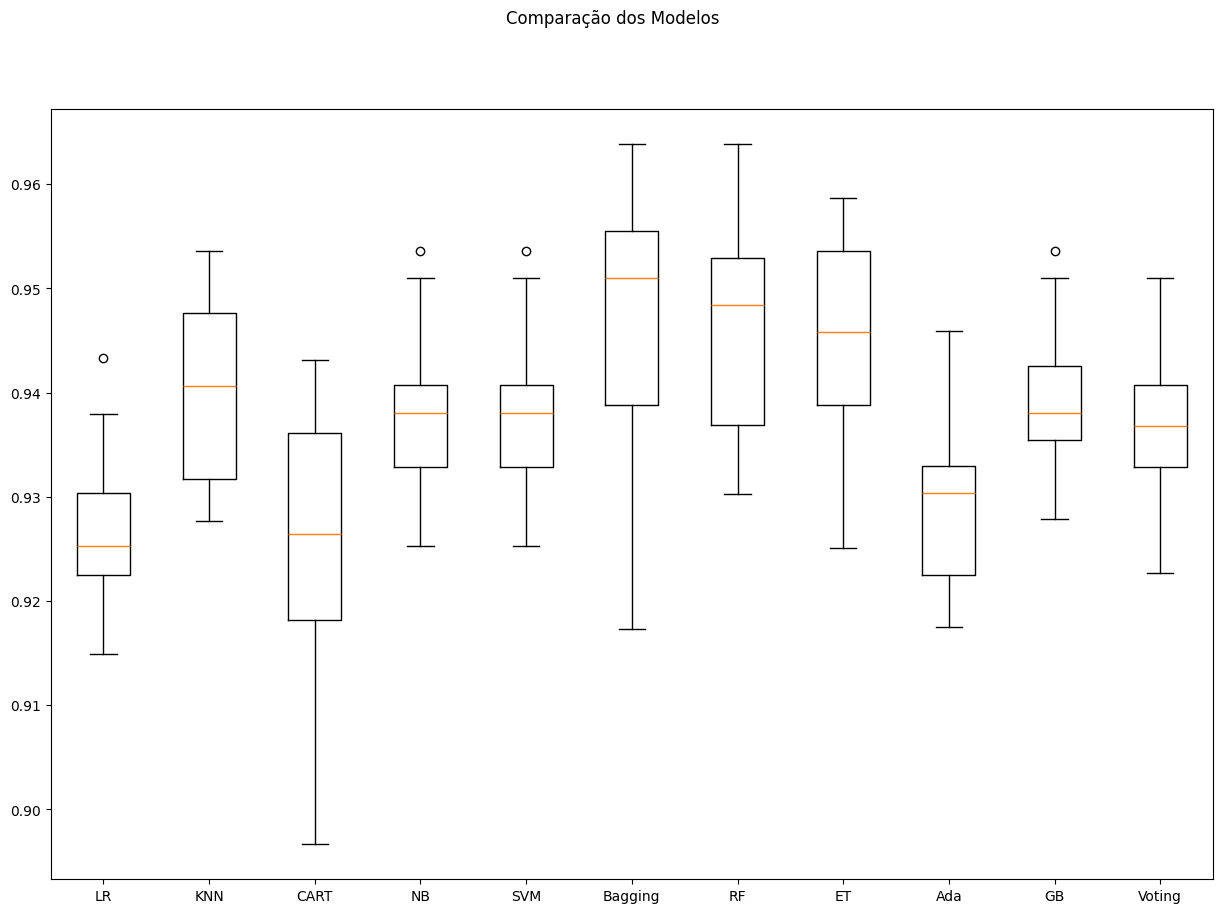

In [41]:
np.random.seed(3) 

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingClassifier(estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(bases)))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos (treinamento)
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Evaluating models using scaled and standardized data

LR-orig: 0.927 (0.008)
KNN-orig: 0.940 (0.009)
CART-orig: 0.924 (0.014)
NB-orig: 0.938 (0.008)
SVM-orig: 0.938 (0.008)
SVM-orig: 0.938 (0.008)
Bag-orig: 0.946 (0.015)
Bag-orig: 0.946 (0.015)
RF-orig: 0.946 (0.011)
RF-orig: 0.946 (0.011)
ET-orig: 0.945 (0.010)
ET-orig: 0.945 (0.010)
Ada-orig: 0.929 (0.008)
Ada-orig: 0.929 (0.008)
GB-orig: 0.940 (0.008)
GB-orig: 0.940 (0.008)
Vot-orig: 0.937 (0.008)
LR-padr: 0.925 (0.007)
KNN-padr: 0.942 (0.010)
Vot-orig: 0.937 (0.008)
LR-padr: 0.925 (0.007)
KNN-padr: 0.942 (0.010)
CART-padr: 0.924 (0.014)
NB-padr: 0.938 (0.008)
CART-padr: 0.924 (0.014)
NB-padr: 0.938 (0.008)
SVM-padr: 0.938 (0.008)
SVM-padr: 0.938 (0.008)
Bag-padr: 0.945 (0.012)
Bag-padr: 0.945 (0.012)
RF-padr: 0.946 (0.010)
RF-padr: 0.946 (0.010)
ET-padr: 0.948 (0.011)
ET-padr: 0.948 (0.011)
Ada-padr: 0.929 (0.008)
Ada-padr: 0.929 (0.008)
GB-padr: 0.940 (0.008)
GB-padr: 0.940 (0.008)
Vot-padr: 0.937 (0.008)
LR-norm: 0.927 (0.009)
KNN-norm: 0.942 (0.011)
Vot-padr: 0.937 (0.008)
LR-norm:

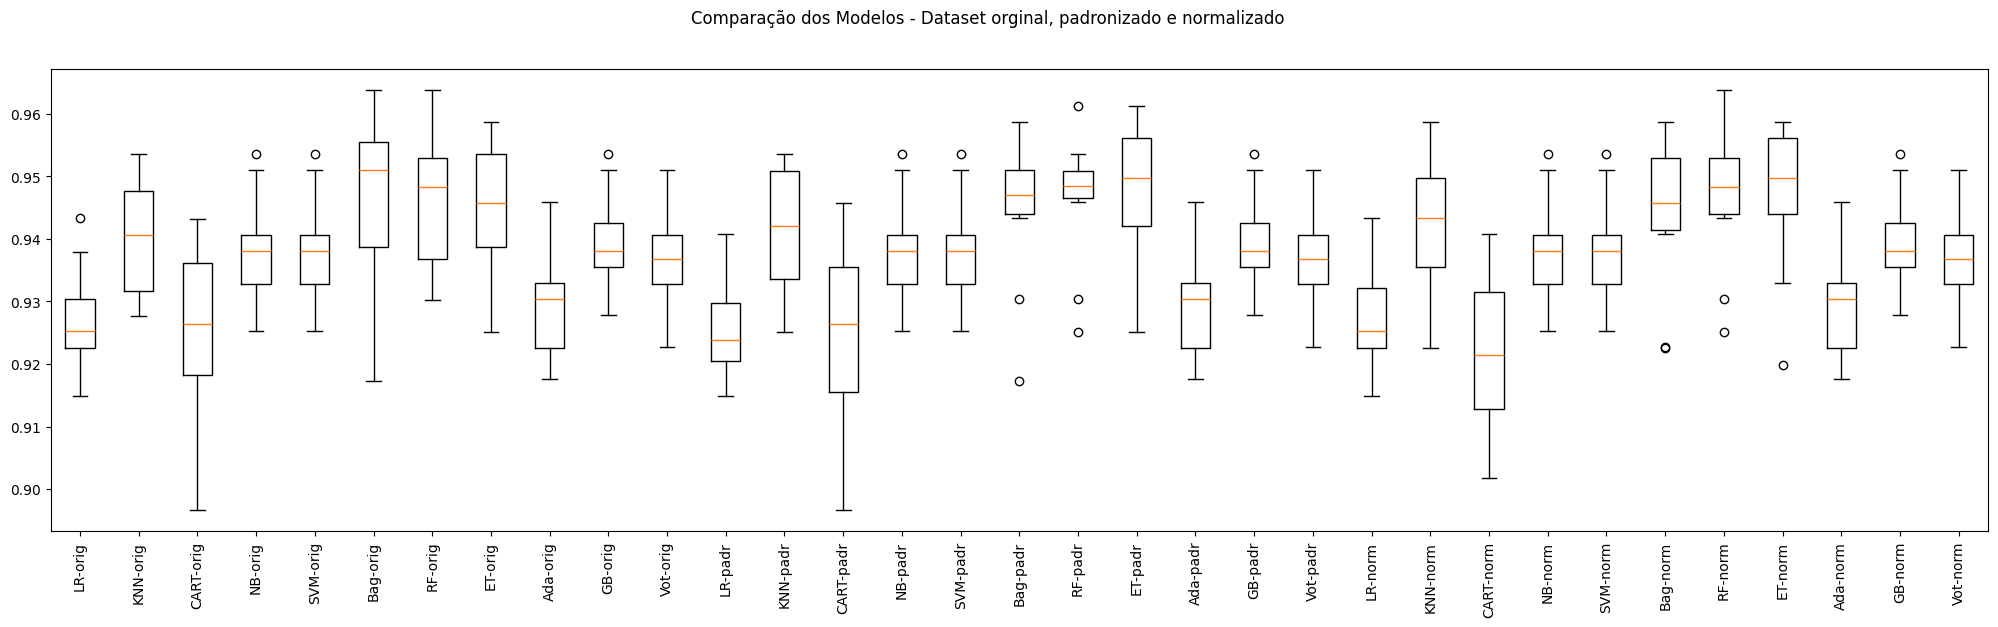

In [42]:
np.random.seed(3) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
reg_log = ('LR', LogisticRegression(max_iter=200))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())
bagging = ('Bag', BaggingClassifier(estimator=base, n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
voting = ('Voting', VotingClassifier(bases))

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines
# A ordem de execução é da esquerda para a direita.

# Dataset original
pipelines.append(('LR-orig', Pipeline([reg_log])))
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('Vot-orig', Pipeline([voting])))

# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log])))
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))
pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging])))
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log])))
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging])))
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

## Tunning

We are going to identify the optimized parameters using Grid Search.

In [43]:
np.random.seed(3)  # Definindo uma semente global para este bloco

# Lista de modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingClassifier(estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(estimators=bases, voting='hard')))

# Definindo os componentes do pipeline
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

# Lista de pipelines
pipelines = []

# Criando pipelines para cada modelo
for name, model in models:
    pipelines.append((name + '-orig', Pipeline(steps=[(name, model)])))
    pipelines.append((name + '-padr', Pipeline(steps=[standard_scaler, (name, model)])))
    pipelines.append((name + '-norm', Pipeline(steps=[min_max_scaler, (name, model)])))

# Definindo os parâmetros para GridSearchCV
param_grids = {
    'LR': {
        'LR__C': [0.01, 0.1, 1, 10, 100],
        'LR__solver': ['liblinear', 'saga']
    },
    'KNN': {
        'KNN__n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21],
        'KNN__metric': ["euclidean", "manhattan", "minkowski"]
    },
    'CART': {
        'CART__max_depth': [None, 10, 20, 30, 40, 50],
        'CART__min_samples_split': [2, 5, 10],
        'CART__min_samples_leaf': [1, 2, 4]
    },
    'NB': {
        'NB__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
    },
    'SVM': {
        'SVM__C': [0.1, 1, 10, 100],
        'SVM__gamma': [1, 0.1, 0.01, 0.001],
        'SVM__kernel': ['rbf', 'linear']
    },
    'RF': {
        'RF__n_estimators': [10, 50, 100, 200],
        'RF__max_features': ['auto', 'sqrt', 'log2'],
        'RF__max_depth': [None, 10, 20, 30],
        'RF__min_samples_split': [2, 5, 10],
        'RF__min_samples_leaf': [1, 2, 4]
    },
    'ET': {
        'ET__n_estimators': [10, 50, 100, 200],
        'ET__max_features': ['auto', 'sqrt', 'log2'],
        'ET__max_depth': [None, 10, 20, 30],
        'ET__min_samples_split': [2, 5, 10],
        'ET__min_samples_leaf': [1, 2, 4]
    },
    'Ada': {
        'Ada__n_estimators': [10, 50, 100, 200],
        'Ada__learning_rate': [0.01, 0.1, 1, 10]
    },
    'GB': {
        'GB__n_estimators': [10, 50, 100, 200],
        'GB__learning_rate': [0.01, 0.1, 0.2, 0.3],
        'GB__max_depth': [3, 5, 7, 9]
    },
    'Voting': {
        # Para VotingClassifier, geralmente não há hiperparâmetros para ajustar diretamente
        # Ajustar os hiperparâmetros dos estimadores base individualmente se necessário
    }
}

# Parâmetros de cross-validation e scoring
scoring = 'accuracy'
kfold = 5

# Executando o GridSearchCV para cada pipeline
for name, pipeline in pipelines:
    model_type = name.split('-')[0]
    if model_type in param_grids:
        param_grid = param_grids[model_type]
    else:
        param_grid = {}  # Para modelos que não têm parâmetros definidos

    grid = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # Imprimindo a melhor configuração
    print("Modelo: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

#It took 53min


Modelo: LR-orig - Melhor: 0.938337 usando {'LR__C': 0.01, 'LR__solver': 'liblinear'}
Modelo: LR-padr - Melhor: 0.938337 usando {'LR__C': 0.01, 'LR__solver': 'liblinear'}
Modelo: LR-padr - Melhor: 0.938337 usando {'LR__C': 0.01, 'LR__solver': 'liblinear'}
Modelo: LR-norm - Melhor: 0.938337 usando {'LR__C': 0.01, 'LR__solver': 'liblinear'}
Modelo: LR-norm - Melhor: 0.938337 usando {'LR__C': 0.01, 'LR__solver': 'liblinear'}
Modelo: KNN-orig - Melhor: 0.941174 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 5}
Modelo: KNN-orig - Melhor: 0.941174 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 5}
Modelo: KNN-padr - Melhor: 0.941175 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 5}
Modelo: KNN-padr - Melhor: 0.941175 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 5}
Modelo: KNN-norm - Melhor: 0.941432 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 5}
Modelo: KNN-norm - Melhor: 0.941432 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 5}
Model

## Conclusion

### Finalizacao do Modelo

The best model is:<br>
`Model: ET-norm – Best score: 0.949687 using {'ET__max_depth': 20, 'ET__max_features': 'log2', 'ET__min_samples_leaf': 1, 'ET__min_samples_split': 2, 'ET__n_estimators': 100}`<br>
The pipeline is going to be created using the optimized hyperparameters and trained on entire dataset.

In [61]:
# Avaliação do modelo com o conjunto de testes
# Melhor modelo
# Modelo: ET-norm - Melhor: 0.949687 usando {'ET__max_depth': 20, 'ET__max_features': 'log2', 'ET__min_samples_leaf': 1, 'ET__min_samples_split': 2, 'ET__n_estimators': 100}

np.random.seed(3)

# Preparação do modelo
model = ExtraTreesClassifier(n_estimators=100,
                             max_features='log2',
                             max_depth=20,
                             min_samples_split=2,
                             min_samples_leaf=1)

pipeline = Pipeline(steps=[('MinMaxScaler', MinMaxScaler()), ('ET', model)])

pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)
print(accuracy_score(y_test, predictions))

0.9391752577319588


Preparação do modelo com TODO o dataset.

In [62]:
pipeline.fit(X, y)

,steps,"[('MinMaxScaler', ...), ('ET', ...)]"
,transform_input,None
,memory,None
,verbose,False
,feature_range,"(0, ...)"
,copy,True
,clip,False
,n_estimators,100
,criterion,'gini'
,max_depth,20
,min_samples_split,2


Prediction on entire dataset.

In [63]:
predictions = pipeline.predict(X)
print(accuracy_score(y, predictions))

0.9820470491126703


Saving pipeline using pickle library.

In [66]:
# Salvando o pipeline
pipeline_filename = 'et_personality_trait_pipeline.pkl'
with open("../models/" + pipeline_filename, 'wb') as file:
    pickle.dump(pipeline, file)


Simulating pipeline usage on unseen data

In [67]:
# Carregando o pipeline salvo
pipeline_filename = 'et_personality_trait_pipeline.pkl'
with open("../models/" + pipeline_filename, 'rb') as file:
    loaded_pipeline = pickle.load(file)

# Criando dados de exemplo para simular dados não vistos
# Substitua com os seus dados de exemplo
# Os dados de exemplo devem ter o mesmo formato (número de colunas/features)
# que os dados de treino originais.
# Exemplo: 7 features para prever se é extrovertido ou introvertido
# Aqui, estou criando um exemplo simples com valores aleatórios.
data_not_seen = np.array([
    [0, 1, 2, 2, 1, 0, 4],
    [2, 5, 1, 4, 5, 2, 1],
    [4, 4, 4, 4, 4, 4, 4]
])

# Aplicando o pipeline nos dados não vistos para fazer previsões
predictions_not_seen = loaded_pipeline.predict(data_not_seen)

print("Previsões para dados não vistos:", predictions_not_seen)


Previsões para dados não vistos: [1. 1. 1.]


## Criando arquivos de outros modelos

The steps above for Extra Trees will be executed to four other models to create pipelines for testing in the developed API.<br>
The models are:<br>
- `Model: RF-norm – Best score: 0.948655 using {'RF__max_depth': None, 'RF__max_features': 'log2', 'RF__min_samples_leaf': 1, 'RF__min_samples_split': 2, 'RF__n_estimators': 200}`<br>
- `Model: GB-padr – Best score: 0.946852 using {'GB__learning_rate': 0.3, 'GB__max_depth': 7, 'GB__n_estimators': 50}`<br>
- `Model: Bagging-padr – Best score: 0.943239 using {}`<br>
- `Model: SVM-padr – Best score: 0.942465 using {'SVM__C': 10, 'SVM__gamma': 1, 'SVM__kernel': 'rbf'}`<br>

Random Forest Classifier<br>
- `Model: RF-norm – Best score: 0.948655 using {'RF__max_depth': None, 'RF__max_features': 'log2', 'RF__min_samples_leaf': 1, 'RF__min_samples_split': 2, 'RF__n_estimators': 200}`

In [68]:

np.random.seed(3)

model = RandomForestClassifier(n_estimators=200,
                             max_features='log2',
                             max_depth=None,
                             min_samples_split=2,
                             min_samples_leaf=1)

pipeline = Pipeline(steps=[('MinMaxScaler', MinMaxScaler()), ('RF', model)])

pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)
print(accuracy_score(y_test, predictions))

0.9391752577319588


In [69]:
pipeline.fit(X, y)

,steps,"[('MinMaxScaler', ...), ('RF', ...)]"
,transform_input,None
,memory,None
,verbose,False
,feature_range,"(0, ...)"
,copy,True
,clip,False
,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2


In [70]:
predictions = pipeline.predict(X)
print(accuracy_score(y, predictions))

0.9820470491126703


In [71]:
# Salvando o pipeline
pipeline_filename = 'rf_personality_trait_pipeline.pkl'
with open("../models/" + pipeline_filename, 'wb') as file:
    pickle.dump(pipeline, file)

In [72]:
# Carregando o pipeline salvo
pipeline_filename = 'rf_personality_trait_pipeline.pkl'
with open("../models/" + pipeline_filename, 'rb') as file:
    loaded_pipeline = pickle.load(file)

# Criando dados de exemplo para simular dados não vistos
# Substitua com os seus dados de exemplo
# Os dados de exemplo devem ter o mesmo formato (número de colunas/features)
# que os dados de treino originais.
# Exemplo: 7 features para prever se é extrovertido ou introvertido
# Aqui, estou criando um exemplo simples com valores aleatórios.
data_not_seen = np.array([
    [0, 1, 2, 2, 1, 0, 4],
    [2, 5, 1, 4, 5, 2, 1],
    [4, 4, 4, 4, 4, 4, 4]
])

# Aplicando o pipeline nos dados não vistos para fazer previsões
predictions_not_seen = loaded_pipeline.predict(data_not_seen)

print("Previsões para dados não vistos:", predictions_not_seen)

Previsões para dados não vistos: [1. 1. 1.]


Gradient Boosting Classifier <br>
- `Model: GB-padr – Best score: 0.946852 using {'GB__learning_rate': 0.3, 'GB__max_depth': 7, 'GB__n_estimators': 50}`<br>

In [73]:
np.random.seed(3)

model = GradientBoostingClassifier(n_estimators=50,
                                   max_depth=7,
                                   learning_rate=0.3)

pipeline = Pipeline(steps=[('MinMaxScaler', MinMaxScaler()), ('GB', model)])

pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)
print(accuracy_score(y_test, predictions))

0.9432989690721649


In [74]:
pipeline.fit(X, y)

,steps,"[('MinMaxScaler', ...), ('GB', ...)]"
,transform_input,None
,memory,None
,verbose,False
,feature_range,"(0, ...)"
,copy,True
,clip,False
,loss,'log_loss'
,learning_rate,0.3
,n_estimators,50
,subsample,1.0


In [75]:
predictions = pipeline.predict(X)
print(accuracy_score(y, predictions))

0.9806025588113908


In [76]:
# Salvando o pipeline
pipeline_filename = 'gb_personality_trait_pipeline.pkl'
with open("../models/" + pipeline_filename, 'wb') as file:
    pickle.dump(pipeline, file)

In [77]:
# Carregando o pipeline salvo
pipeline_filename = 'gb_personality_trait_pipeline.pkl'
with open("../models/" + pipeline_filename, 'rb') as file:
    loaded_pipeline = pickle.load(file)

# Criando dados de exemplo para simular dados não vistos
# Substitua com os seus dados de exemplo
# Os dados de exemplo devem ter o mesmo formato (número de colunas/features)
# que os dados de treino originais.
# Exemplo: 7 features para prever se é extrovertido ou introvertido
# Aqui, estou criando um exemplo simples com valores aleatórios.
data_not_seen = np.array([
    [0, 1, 2, 2, 1, 0, 4],
    [2, 5, 1, 4, 5, 2, 1],
    [4, 4, 4, 4, 4, 4, 4]
])

# Aplicando o pipeline nos dados não vistos para fazer previsões
predictions_not_seen = loaded_pipeline.predict(data_not_seen)

print("Previsões para dados não vistos:", predictions_not_seen)

Previsões para dados não vistos: [1. 1. 1.]


Bagging Classifier<br>
- `Model: Bagging-padr – Best score: 0.943239 using {}`<br>

In [78]:
np.random.seed(3)

model = BaggingClassifier()

pipeline = Pipeline(steps=[('MinMaxScaler', MinMaxScaler()), ('Bagging', model)])

pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)
print(accuracy_score(y_test, predictions))

0.9391752577319588


In [79]:
pipeline.fit(X, y)

,steps,"[('MinMaxScaler', ...), ('Bagging', ...)]"
,transform_input,None
,memory,None
,verbose,False
,feature_range,"(0, ...)"
,copy,True
,clip,False
,estimator,None
,n_estimators,10
,max_samples,1.0
,max_features,1.0


In [80]:
predictions = pipeline.predict(X)
print(accuracy_score(y, predictions))

0.9797771357820884


In [81]:
# Salvando o pipeline
pipeline_filename = 'bagging_personality_trait_pipeline.pkl'
with open("../models/" + pipeline_filename, 'wb') as file:
    pickle.dump(pipeline, file)

In [82]:
# Carregando o pipeline salvo
pipeline_filename = 'bagging_personality_trait_pipeline.pkl'
with open("../models/" + pipeline_filename, 'rb') as file:
    loaded_pipeline = pickle.load(file)

# Criando dados de exemplo para simular dados não vistos
# Substitua com os seus dados de exemplo
# Os dados de exemplo devem ter o mesmo formato (número de colunas/features)
# que os dados de treino originais.
# Exemplo: 7 features para prever se é extrovertido ou introvertido
# Aqui, estou criando um exemplo simples com valores aleatórios.
data_not_seen = np.array([
    [0, 1, 2, 2, 1, 0, 4],
    [2, 5, 1, 4, 5, 2, 1],
    [4, 4, 4, 4, 4, 4, 4]
])

# Aplicando o pipeline nos dados não vistos para fazer previsões
predictions_not_seen = loaded_pipeline.predict(data_not_seen)

print("Previsões para dados não vistos:", predictions_not_seen)

Previsões para dados não vistos: [1. 1. 1.]


Support Vector Classifier <br>
- `Model: SVM-padr – Best score: 0.942465 using {'SVM__C': 10, 'SVM__gamma': 1, 'SVM__kernel': 'rbf'}`<br>

In [83]:
np.random.seed(3)

model = SVC(C=10, gamma=1, kernel='rbf')

pipeline = Pipeline(steps=[('MinMaxScaler', MinMaxScaler()), ('SVM', model)])

pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)
print(accuracy_score(y_test, predictions))

0.9360824742268041


In [85]:
pipeline.fit(X, y)

,steps,"[('MinMaxScaler', ...), ('SVM', ...)]"
,transform_input,None
,memory,None
,verbose,False
,feature_range,"(0, ...)"
,copy,True
,clip,False
,C,10
,kernel,'rbf'
,degree,3
,gamma,1


In [86]:
predictions = pipeline.predict(X)
print(accuracy_score(y, predictions))

0.9378869170449855


In [87]:
# Salvando o pipeline
pipeline_filename = 'svm_personality_trait_pipeline.pkl'
with open("../models/" + pipeline_filename, 'wb') as file:
    pickle.dump(pipeline, file)

In [88]:
# Carregando o pipeline salvo
pipeline_filename = 'svm_personality_trait_pipeline.pkl'
with open("../models/" + pipeline_filename, 'rb') as file:
    loaded_pipeline = pickle.load(file)

# Criando dados de exemplo para simular dados não vistos
# Substitua com os seus dados de exemplo
# Os dados de exemplo devem ter o mesmo formato (número de colunas/features)
# que os dados de treino originais.
# Exemplo: 7 features para prever se é extrovertido ou introvertido
# Aqui, estou criando um exemplo simples com valores aleatórios.
data_not_seen = np.array([
    [0, 1, 2, 2, 1, 0, 4],
    [2, 5, 1, 4, 5, 2, 1],
    [4, 4, 4, 4, 4, 4, 4]
])

# Aplicando o pipeline nos dados não vistos para fazer previsões
predictions_not_seen = loaded_pipeline.predict(data_not_seen)

print("Previsões para dados não vistos:", predictions_not_seen)

Previsões para dados não vistos: [1. 0. 0.]
